# Cluster Analysis III


## Evaluation

- **Intrinsic**: we do not have any ground truth
  - this is the typical case
- **Extrinsic**: we have some kind of ground truth
  - synthetic data
  - small dataset manually labeled
  - dataset that was labeled afterwards


## Intrinsic evaluation

- Distance based measure in absence of ground truth
- Considers both **intra-class similarity** and **inter-class dissimilarity**

- For a single object $o_i$ belonging to cluster $C_h$:
  - we measure **intra-class similarity** as:
$$
a(o_i) = \frac{\sum\limits_{o_j\in C_h, i\neq j} \textsf{dist}(o_i,o_j)}{|C_h|-1}
$$
  - we measure **inter-class dissimilarity** as:
  $$
  b(o_i) = \min\limits_{C_k\neq C_h} \left\{\frac{\sum\limits_{o_j\in C_k} \textsf{dist}(o_i,o_j)}{|C_k|}\right\}
  $$


- We define the **silhouette coefficient** for $o_i$ as:
$$
s(o_i) = \frac{b(o_i)-a(o_i)}{\max\{a(o_i),b(o_i)\}}
$$


- The value of the silhouette coefficient is between −1 and 1. The larger the better.

- The silhouette coefficient for the full clustering can be computed by averaging across all the objects in the dataset.

## Extrinsic evaluation


- Let $C(o_i)$ be the cluster id provided by the clustering algorithm for object $o_i$.

- Assume we have $L(o_i)$ being the true clustering label of the object $o_i$.

We can build the following contingency table.


| | Same Cluster | Different Cluster |
|---|---|---|
|**Same Label** | # True Positives | # False Negatives |
|**Different Label** | # False Positives | # True Negatives |

*Positive* means objects were assigned to the same cluster, *Negative* means were assigned to different clusters. *True* and *False* refer to whether this decision is in accordance with the true labels. more formally:

- True Positives $TP=|\{o_i,o_j~|~C(o_i)=C(o_j)\wedge~L(o_i)=L(o_j)\}|$
- False Positives $FP=|\{o_i,o_j~|~C(o_i)=C(o_j)\wedge~L(o_i)\neq L(o_j)\}|$
- True Negatives $TN=|\{o_i,o_j~|~C(o_i)\neq C(o_j)\wedge~L(o_i)\neq L(o_j)\}|$
- False Negatives $FN=|\{o_i,o_j~|~C(o_i)\neq C(o_j)\wedge~L(o_i)=L(o_j)\}|$

On the basis of the above contingency table, two measures are commonly used: Rand Statistic and Jaccard Coefficient.

$$
\textrm{Rand Statistic} = \frac{TP+TN}{TP + FP + TN+ FN}
$$

$$
\textrm{Jaccard Coefficient} = \frac{TP}{TP + FP + FN}
$$


Rand statistics measures the number of pairs for which a correct clustering decision was made. When the number of classes/clusters is large, then the number of True Negatives is likely to increase (in a random clustering it is likely to have a large number of TN).
The Jaccard Coefficient disregards True Negatives.

## Using Silhouette coefficient to find the best cluster number

For n_clusters = 2 The average silhouette_score is : 0.6897343136504226
For n_clusters = 3 The average silhouette_score is : 0.7102064332256162
For n_clusters = 4 The average silhouette_score is : 0.5552177355931414
For n_clusters = 5 The average silhouette_score is : 0.5868086671557396
For n_clusters = 6 The average silhouette_score is : 0.5084204196362635
For n_clusters = 7 The average silhouette_score is : 0.5724070647685567


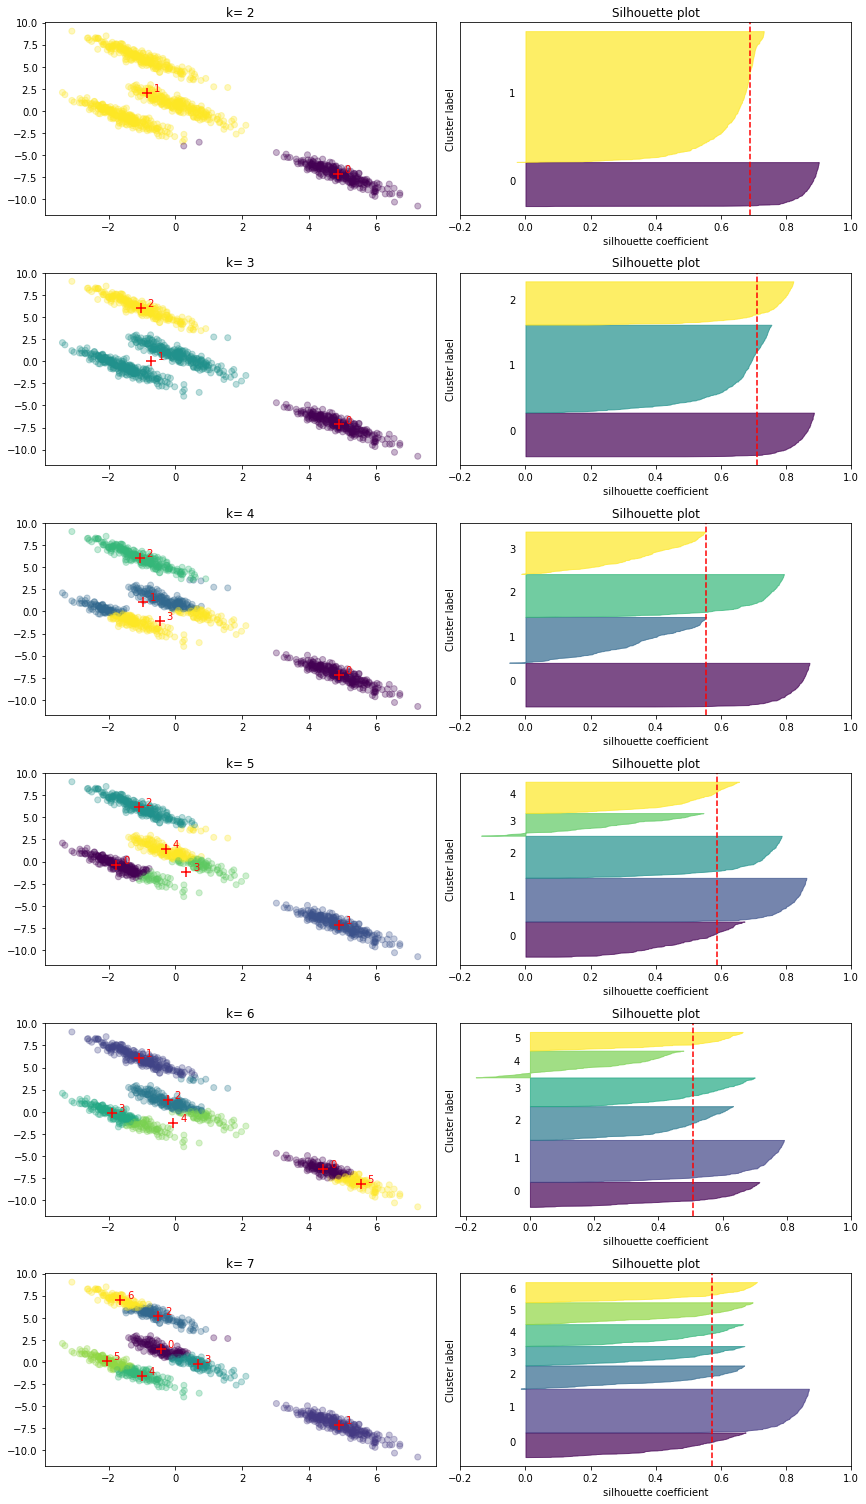

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, 
                            cluster_std=1, random_state=22222222)
transformation = [[0.6, -0.6], [-0.4, 0.9]]
X = np.dot(X, transformation)


n_clusters = [2,3,4,5,6,7]
fig, axs = plt.subplots(nrows=len(n_clusters), ncols=2, 
                        figsize=(12,21), tight_layout=True)

for i, n_c in enumerate(n_clusters):

    # -----------
    # K-Means
    k_means = KMeans(n_clusters=n_c, n_init=1)
    k_means.fit(X)
    
    
    # plot output of k-means
    axs[i,0].scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=0.3)
    c = k_means.cluster_centers_
    axs[i,0].scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
    
    for c_id in range(len(c)):
        axs[i,0].text(c[c_id,0]+.2, c[c_id,1]+.2, str(c_id), color='red')

    axs[i,0].set_title("k= "+str(n_c))
    
    # silhouette
    silhouette_avg = silhouette_score(X, k_means.labels_)
    print("For n_clusters =", n_c,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, k_means.labels_)

    y_lower = 0
    for j in range(n_c):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[k_means.labels_ == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(j) / (n_c-1))
        axs[i,1].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[i,1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper

    axs[i,1].set_title("Silhouette plot")
    axs[i,1].set_xlabel("silhouette coefficient")
    axs[i,1].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axs[i,1].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[i,1].set_yticks([])  # Clear the yaxis labels / ticks
    axs[i,1].set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])


### Exercise: Use Silhouette coefficients plot to find the best number of clusters for Hierarchical clustering

### Exercise: Use Silhouette coefficients plot to find the best parameters for DBScan

### Exercise: For each clustering algorithm, create one dataset where that algorithm performs well while others fail

## Scikit-Learn Clustering Algorithms

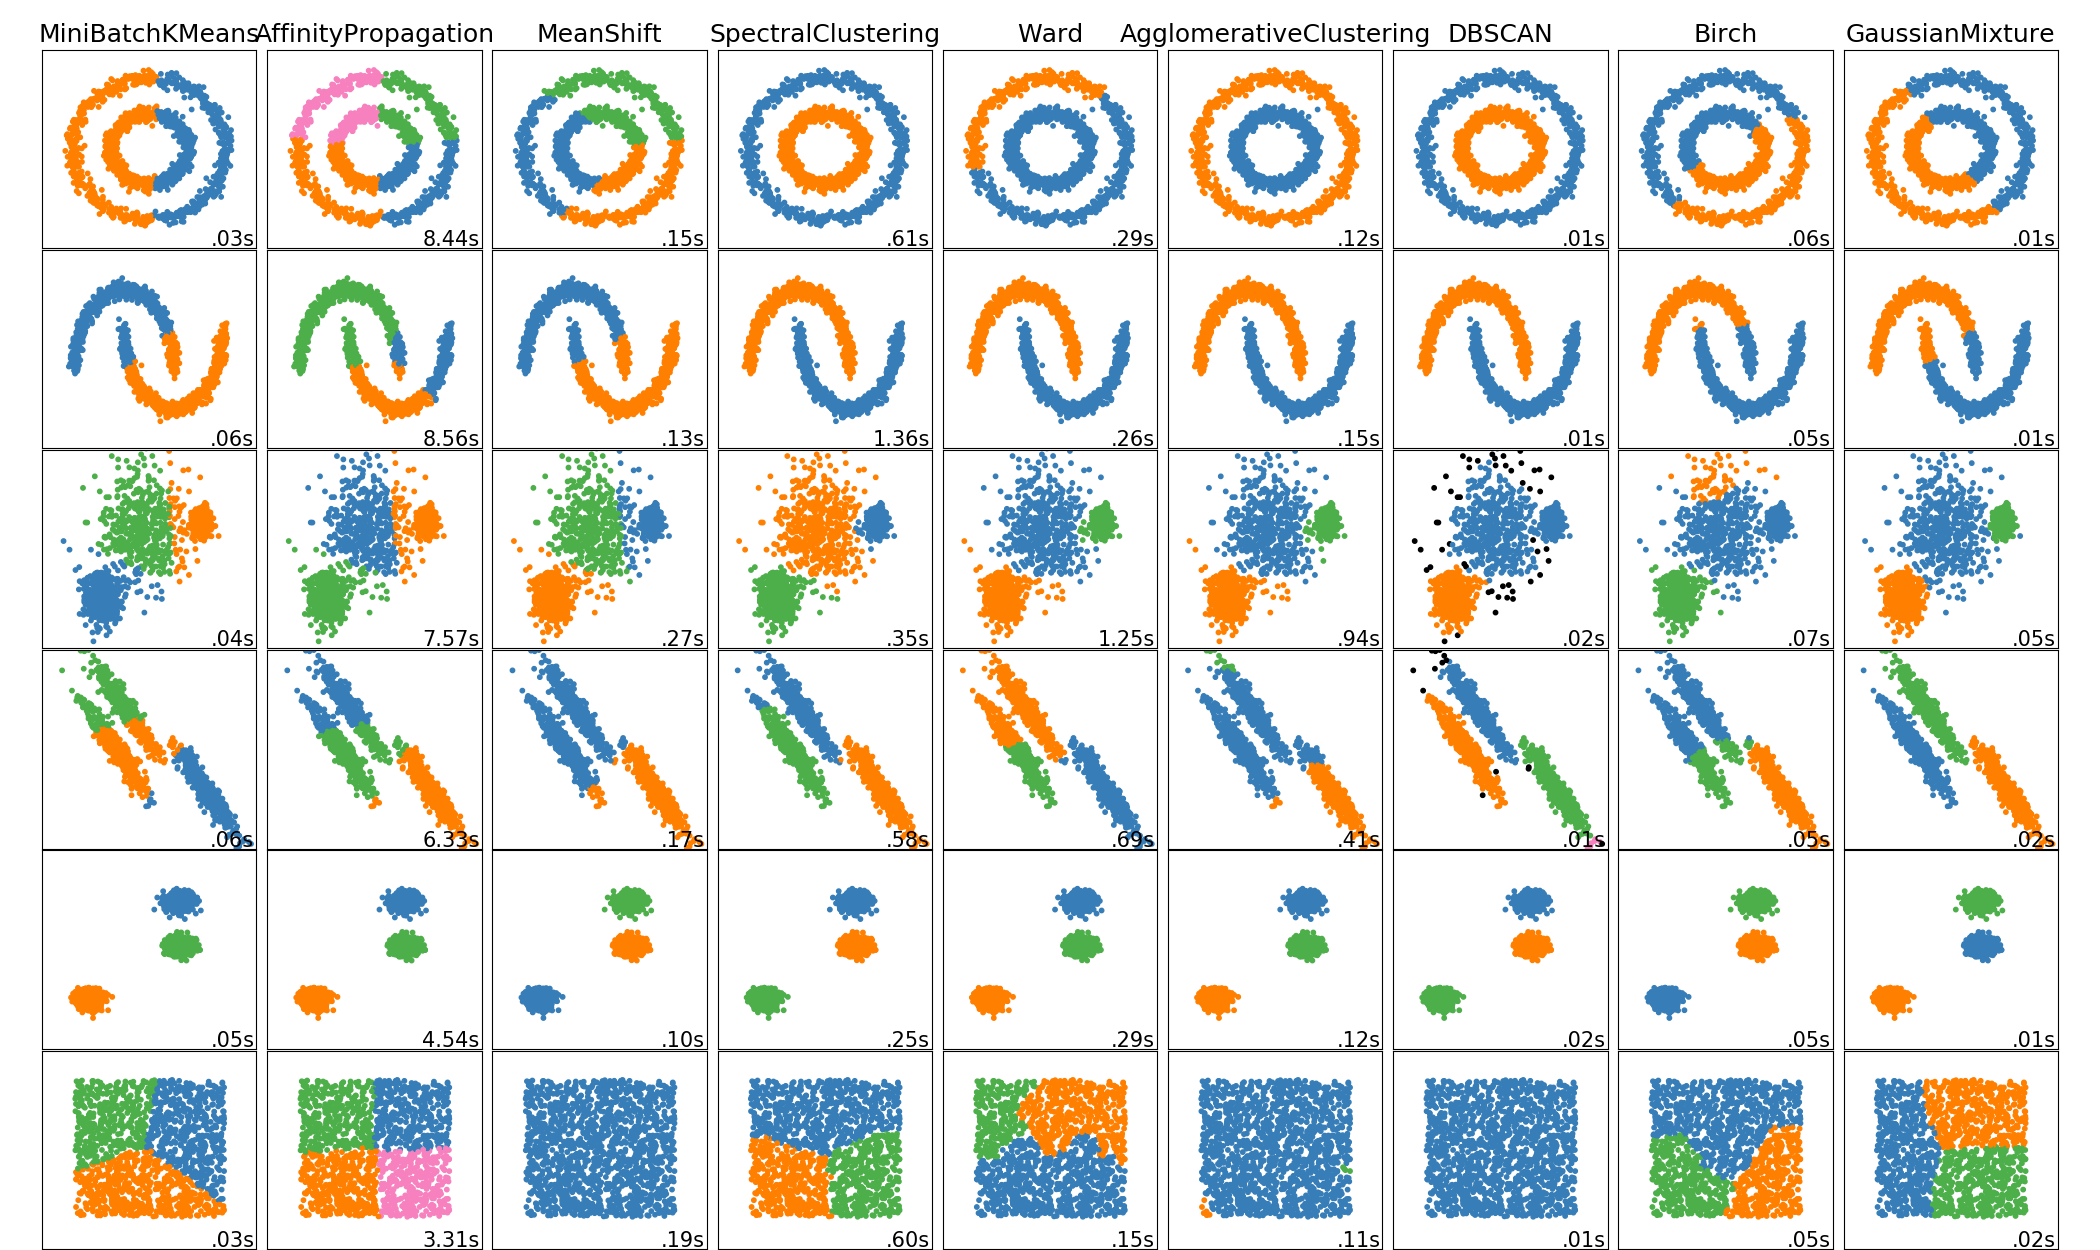

## Clustering of daily stock movements

The dataset contains daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day) of a given set of companies (timeframe: 2010 to 2015; source: Yahoo! Finance).

In [2]:
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

data_url = 'https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv'
df = pd.read_csv(data_url)

In [3]:
df

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [4]:
df.shape

(60, 964)

In [5]:
names = df.iloc[:,0].values
data  = df.iloc[:,1:].values

In [6]:
type(data)

numpy.ndarray

In [7]:
names

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

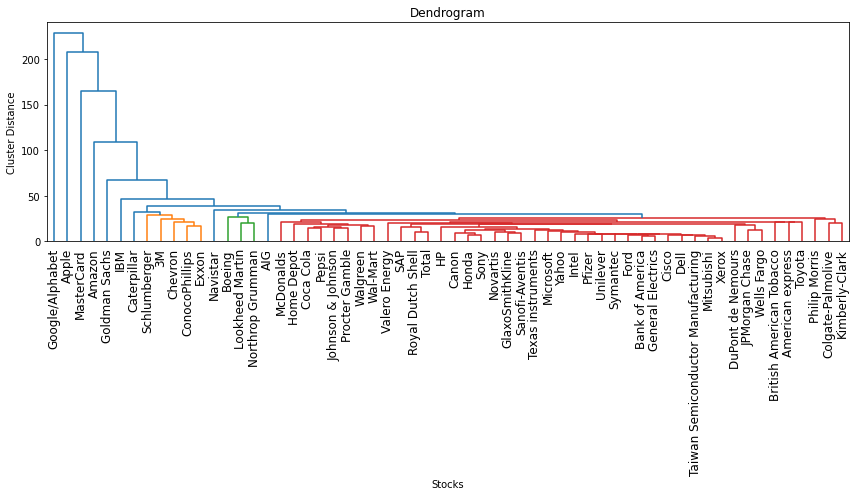

In [8]:
import matplotlib.pyplot as plt
# run the clustering
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(data, method="complete")

# plot the dendrogram
fig, ax = plt.subplots(figsize=(12,7), tight_layout=True)

dendrogram( Z, 
            color_threshold=30,
            labels=list(names), leaf_font_size=12 )

ax.set_ylabel("Cluster Distance")
ax.set_xlabel("Stocks")
ax.set_title("Dendrogram");

In [9]:
companies_1 = np.flatnonzero( (names=='Boeing') | (names=='Lookheed Martin')  | (names=='Northrop Grumman'))
print (companies_1)

[ 4 29 36]


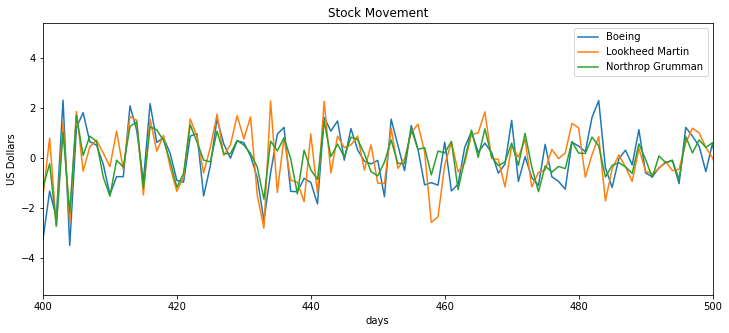

In [10]:
# plot intresting stocks
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))

for c_id in companies_1:
    ax.plot(data[c_id, :], label=names[c_id])

ax.set_ylabel("US Dollars")
ax.set_xlabel("days")
ax.set_title("Stock Movement")
ax.set_xlim(400,500)
ax.legend();

In [11]:
companies_2 = np.flatnonzero( (names=='Honda') | (names=='Sony')  | (names=='Toyota'))
print (companies_2)

[21 45 48]


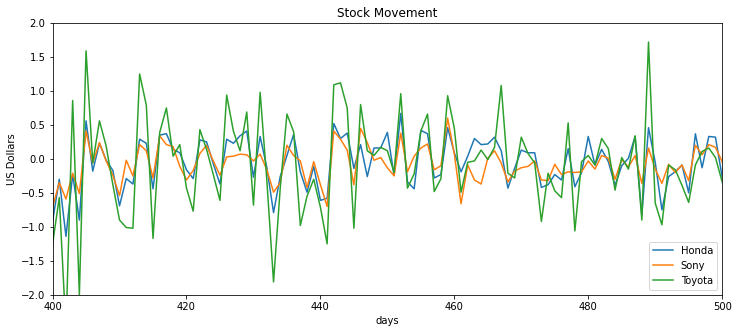

In [12]:
# plot intresting stocks
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

for c_id in companies_2:
    ax.plot(data[c_id, :], label=names[c_id])

ax.set_ylabel("US Dollars")
ax.set_xlabel("days")
ax.set_title("Stock Movement")
ax.set_xlim(400,500)
ax.set_ylim(-2,2)
ax.legend();

**Comment.** Apparently, Toyota trends are similar to that of Honda, with a different magnitude. This is of course not captured by Euclidean distance. We rather need a *scale invariant* similarity measure.

In [13]:
# Method to calculate distances between all sample pairs
from scipy.spatial.distance import pdist
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

print ( pdist( data[ companies_2,: ], metric = "euclidean") ) 

[ 7.34848216 15.68646839 17.70288975]


In [14]:
from scipy.spatial.distance import squareform

print (names[companies_2])
print ( squareform( pdist( data[ companies_2,: ], 
                          metric = "euclidean") ) )

['Honda' 'Sony' 'Toyota']
[[ 0.          7.34848216 15.68646839]
 [ 7.34848216  0.         17.70288975]
 [15.68646839 17.70288975  0.        ]]


In [15]:
print (names[companies_2])
print ( squareform( pdist( data[ companies_2,: ], 
                          metric = "correlation") ) )

# Note the formulation used in numpy to take into account that we need a distance
#      and not a similarity

['Honda' 'Sony' 'Toyota']
[[0.         0.34797994 0.28262266]
 [0.34797994 0.         0.43158741]
 [0.28262266 0.43158741 0.        ]]


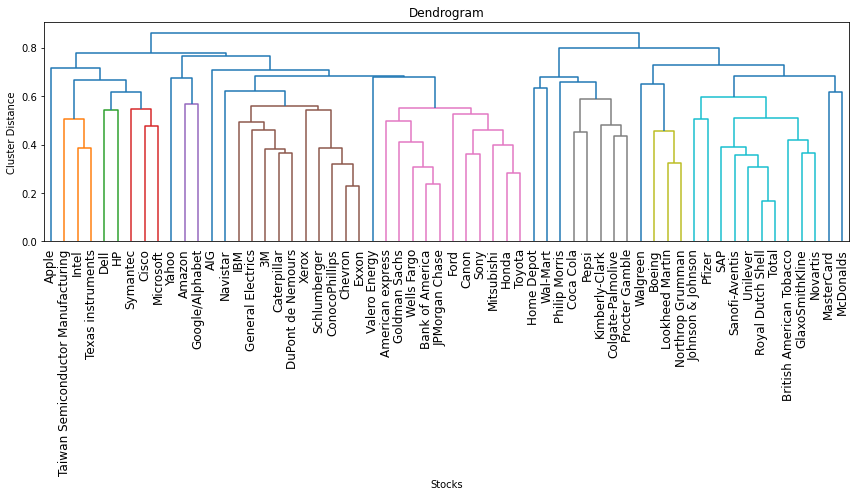

In [16]:
# precompute distances
distance_matrix = pdist( data, metric = "correlation")

# run the clustering
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage( distance_matrix, method="complete")

# plot the dendrogram
fig, ax = plt.subplots(figsize=(12,7), tight_layout=True)

dendrogram( Z, 
            color_threshold = .6,
            labels = list(names), leaf_font_size=12 )

ax.set_ylabel("Cluster Distance")
ax.set_xlabel("Stocks")
ax.set_title("Dendrogram");

In [17]:
# cluster flattening
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, t=0.6, criterion="distance")

labels

array([ 4, 11,  5,  9, 16,  9, 18,  9,  7, 14,  7,  3,  7,  7,  2,  9,  7,
        5,  9, 18, 12,  9,  2,  7,  1, 18,  9, 14, 14, 16, 19, 20,  7,  3,
        9,  8, 16, 18, 14, 18, 14, 15, 18, 18,  7,  9, 18,  3,  9, 18,  1,
        1, 18, 10, 17,  9, 13,  7,  7,  6], dtype=int32)

In [18]:
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# silhouette
silhouette_avg = silhouette_score( squareform(distance_matrix), 
                                   labels,  
                                   metric="precomputed")

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.0981701176128052


The average silhouette_score is : 0.0981701176128052


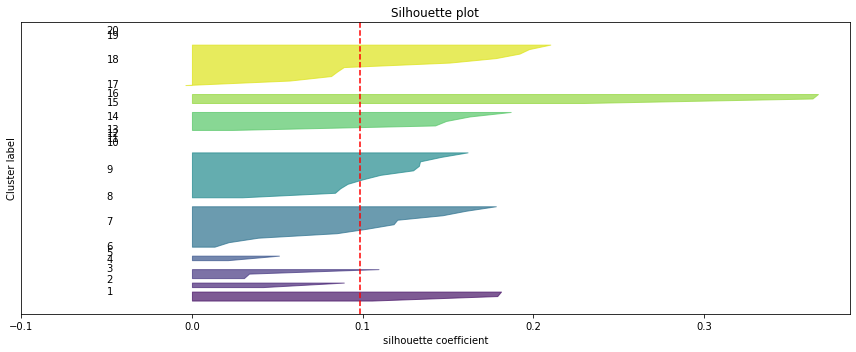

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


# silhouette
silhouette_avg = silhouette_score( squareform(distance_matrix), 
                                   labels,  
                                   metric="precomputed")

print("The average silhouette_score is :", silhouette_avg)


# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples( squareform(distance_matrix), 
                                               labels,
                                               metric="precomputed")

fig, ax = plt.subplots(figsize=(12,5), tight_layout=True)

y_lower = 0
n_c = max(labels) - min(labels) + 1
for j in range(min(labels),max(labels)+1):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == j]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(j) / (n_c-1))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

    # Compute the new y_lower for next plot
    y_lower = y_upper

ax.set_title("Silhouette plot")
ax.set_xlabel("silhouette coefficient")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.1, 0.2, 0.3]);
